In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # data visualization: graphics
import matplotlib.pyplot as plt # data visualization: graphics
from sklearn.model_selection import train_test_split # split dataset into train/test
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn import metrics # accuracy of model

In [2]:
# load data
iris = pd.read_csv("iris_data.csv")

In [3]:
# show the first 10 elements
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [4]:
# infos dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
# split dataset train/test 70/30
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [18]:
# taking training/test data resources
train_x = train[list(iris.columns.values)[0:-1]]
train_y = train[list(iris.columns.values)[-1]]
test_x = test[list(iris.columns.values)[0:-1]]
test_y = test[list(iris.columns.values)[-1]]


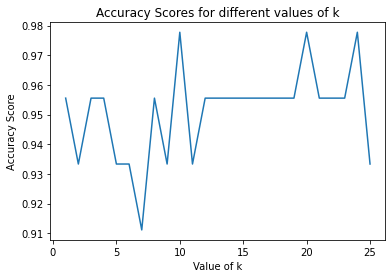

In [19]:
# Test best value for K-value in KNN
k_range = range(1,26)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k) # define k value
  knn.fit(train_x, train_y) # train
  y_pred = knn.predict(test_x) # test
  scores.append(metrics.accuracy_score(test_y, y_pred)) # test accuracy

plt.plot(list(k_range), scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [21]:
# Pegando o maior score para usar seu K-value
max_score = -1
k_max_score = -1
for k in k_range:
  if scores[k-1] > max_score:
    max_score = scores[k-1]
    k_max_score = k

print(max_score)
print(k_max_score)

0.9777777777777777
10


In [26]:
# KNN
knn = KNeighborsClassifier(n_neighbors=k_max_score)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
precision = metrics.accuracy_score(test_y, y_pred)*100
print('The accuracy of the KNN is {0:.2f}%'.format(precision))


The accuracy of the KNN is 97.78%


In [12]:
# new data to be classified
x_new = np.array([[1, 2.9, 10, 0.2]])
prediction = knn.predict(x_new)

print(prediction[0])

Virginica
